## Detection Models Comparison

- DNN detects a face on every single face opportunity, but the confidences are all over the place. We need to set a confidence threshold whichever detection model we decide to use.
    
- Mtcnn is the second best model in terms of number of detections, in terms of confidence scores, this model does the best. 
    
- CNN is the fastest model amongst all but it has the lowest number of detections and confidence scores not as high as MTCNN

In [125]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import os
import glob
import cv2

In [126]:
paths = {
    'dnn':'face_det_results_dnn/',
    'mtcnn': 'face_det_results_mtcnn/',
    'cnn': 'face_det_results_cnn/', 
}

In [127]:
for model, path in paths.items(): print('number of detections: %d in folder: %s' % (len(os.listdir(path))-2, model))

number of detections: 137 in folder: dnn
number of detections: 56 in folder: mtcnn
number of detections: 51 in folder: cnn


In [128]:
dfs = []
for model, path in paths.items():
    df = pd.read_csv(path+'confidence.csv', header=None, names=['filename', 'confidence'])
    df['model'] = model
    dfs.append(df)
confidences = reduce(lambda left,right: pd.merge(left,right,on='filename', how='outer'), dfs)
confidences = confidences.rename(columns={
    "confidence_x": "confidence_dnn",
    "confidence_y": "confidence_mtcnn", 
    "confidence": "confidence_cnn",
    'model_x': 'model_dnn',
    'model_y': 'model_mtcnn',
    'model': 'model_cnn',
})

The table below shows the number of detections (count) and their stats for each detection model.

In [130]:
confidences.describe()

confidence_dnn  confidence_mtcnn  confidence_cnn
count      137.000000         57.000000       51.000000
mean         0.879079          0.973934        0.880919
std          0.193045          0.027890        0.284676
min          0.170150          0.905022        0.015467
25%          0.839926          0.956025        0.811338
50%          0.967185          0.985676        1.018837
75%          0.997655          0.995178        1.059525
max          0.999940          0.999864        1.119673

In [153]:
data = [confidences[confidences['confidence_' + model].notnull()]['confidence_' + model].tolist() for model in paths]

Boxplot for detection model confidences. Dnn can detect a lot more but confidences are all over the place, cnn doesn't detect as much and the confidences are all over the place. Mtcnn detects more faces than cnn and the confidence scores are high.

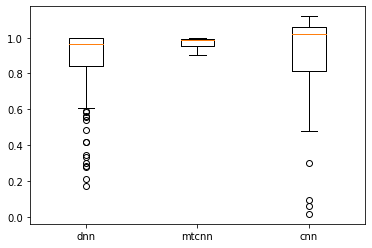

In [157]:
plt.boxplot(data)
plt.xticks([1,2,3], ['dnn', 'mtcnn', 'cnn'])
plt.show()

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [104]:
og_path = 'faces/'
og_face_files = os.listdir(og_path)

In [105]:
def read_img(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

The first column is the original image collected from faceOpportunity, following columns are dnn, mtcnn and cnn results.

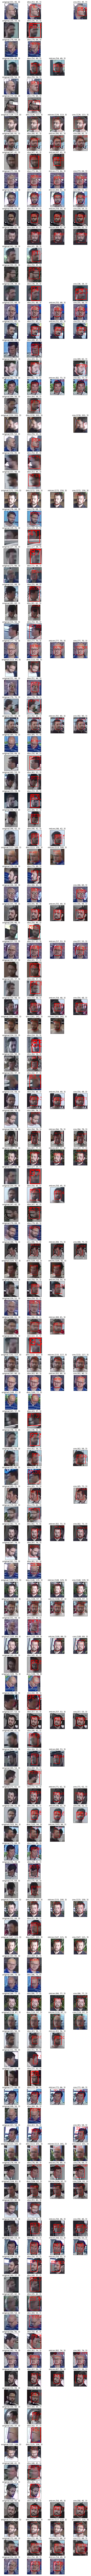

In [106]:
fig, axs = plt.subplots(nrows=len(og_face_files), ncols=4, figsize=(10, 300))
for i, filename in enumerate(os.listdir(og_path)):
    image = cv2.imread(os.path.join(og_path, filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i,0].imshow(image, interpolation='nearest')
    axs[i,0].title.set_text('original,' + str(image.shape))
    axs[i,0].get_xaxis().set_visible(False)
    axs[i,0].get_yaxis().set_visible(False)
    for x, key in enumerate(paths):
        if os.path.exists(paths[key] + filename): 
            image = read_img(paths[key] + filename)
            axs[i,x+1].imshow(image, interpolation='nearest')
            axs[i,x+1].title.set_text(key + ',' + str(image.shape))
            axs[i,x+1].get_xaxis().set_visible(False)
            axs[i,x+1].get_yaxis().set_visible(False)
        else:
            axs[i,x+1].axis('off')
plt.show();